In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from datetime import datetime, timedelta
import seaborn as sns

import datetime
from dateutil.parser import parse

import numpy as np


from matplotlib import rcParams

plt.rcParams["figure.figsize"] = (20,10)
# %reset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import glob

all_files = glob.glob("./Duo_Auth*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Francisco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df['Timestamp (UTC)'] = pd.to_datetime(df['Timestamp (UTC)'])
df['date'] = df['Timestamp (UTC)'].apply(lambda timestamp: timestamp.date())
df['month'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.month)
df['hour'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.hour)
df['minute'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.minute)
df['second'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.second)

In [5]:
logs = df
print(logs.shape)
logs.head(2)

(7077783, 16)


Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   

   month  hour  minute  second  
0      4     7       0       7  
1      4     7       0      10

In [6]:
users = pd.read_csv('duo_users_clean.csv')
users['Created'] = users['Created'].apply(lambda date: parse(date))
users.head()

Alias  Status             Created      Last Login Phone 1 platform  \
0  user_000001  Active 2017-04-26 18:31:00  4/7/2021 15:00         Landline   
1  user_000002  Active 2017-04-26 18:58:00  4/6/2021 21:34          Android   
2  user_000003  Active 2017-04-27 20:42:00  4/6/2021 16:35         Landline   
3  user_000004  Active 2017-08-16 17:10:00  4/7/2021 14:23              iOS   
4  user_000005  Active 2017-09-12 22:03:00   4/7/2021 0:17          Android   

  Phone 2 platform Phone 3 platform Phone 4 platform Phone 5 platform  \
0              NaN              NaN              NaN              NaN   
1         Landline              NaN              NaN              NaN   
2          Android              NaN              NaN              NaN   
3         Landline              NaN              NaN              NaN   
4         Landline              NaN              NaN              NaN   

  Phone 6 platform Phone 7 platform  Student     Description  Index  
0              NaN              NaN    False  Active (Staff)      1  
1              NaN              NaN    False  Active (Staff)      2  
2              NaN              NaN    False  Active (Staff)      3  
3              NaN              NaN    False  Active (Staff)      4  
4              NaN              NaN    False  Active (Staff)      5

In [7]:
# Get a list of users who have logged in that have logged in
usersWhoHaveLoggedIn = logs.Alias.unique()

In [8]:
subsetOfUsers = users[users['Alias'].isin(usersWhoHaveLoggedIn)]
len(subsetOfUsers)

50962

In [9]:
subsetOfUsers['Description'].fillna("", inplace=True)

C:\Users\Francisco\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
subsetOfUsers = subsetOfUsers[~subsetOfUsers["Description"].str.contains("Disabled")]
subsetOfUsers = subsetOfUsers[~subsetOfUsers["Description"].str.contains("DISABLED")]

In [11]:
# have to run up to list line when starting

In [ ]:
# get time of errors occuring 

In [11]:
logs.head()

Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   
2 2021-04-01 07:00:11.738361+00:00  user_013462  Single Sign-On  Phone Call   
3 2021-04-01 07:00:25.203564+00:00  user_025756  Single Sign-On    Duo Push   
4 2021-04-01 07:00:27.389194+00:00  user_030286  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   
2  SUCCESS  User approved       False                    US   
3  SUCCESS  User approved       False                    US   
4  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   
2          California      San Francisco                    NaN  2021-04-01   
3          California               Lodi                    NaN  2021-04-01   
4          California            Antioch                    NaN  2021-04-01   

   month  hour  minute  second  
0      4     7       0       7  
1      4     7       0      10  
2      4     7       0      11  
3      4     7       0      25  
4      4     7       0      27

In [157]:
logs["Day"] = logs["date"].apply(lambda date: date.strftime('%a'))

In [158]:
errorLogs = logs[logs["Result"]=="FAILURE"]

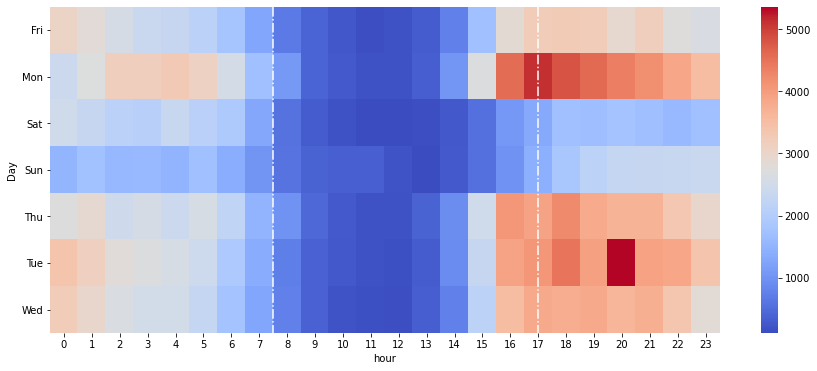

In [169]:
df_m = errorLogs.groupby(["Day", "hour"]).size().unstack(level=0)
df_m = df_m.fillna(0)
rcParams['figure.figsize'] = 15,6
ax = sns.heatmap(df_m.transpose(), cmap='coolwarm')
# plt.xticks(rotation=45)
ax.vlines([8,17.5],*ax.get_xlim(), color='white', linestyle='dashdot')
plt.yticks(rotation=0)
# plt.xticks(rotation=80)
plt.show()
plt.rcParams["figure.figsize"] = (20,50)

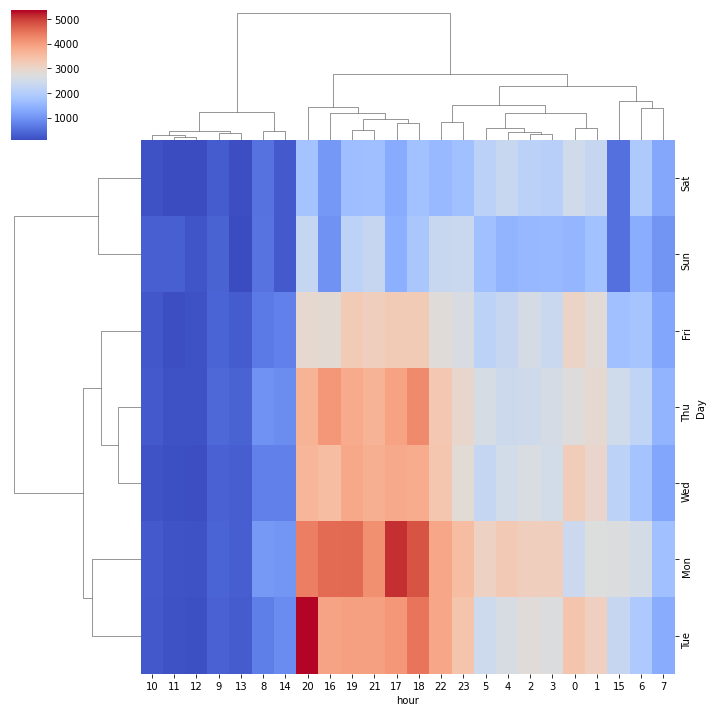

In [31]:
sns.clustermap(df_m.transpose(),cmap="coolwarm")
plt.show()

In [12]:
subsetOfUsers.Description.value_counts()

Active (Student)                                                32931
Active (Formerstudent)                                           6685
Active (Student, Applicant)                                      4319
Active (Faculty)                                                 1773
Active (Staff)                                                   1179
Active (Applicant)                                                750
Active (Applicant, Formerstudent)                                 371
Active (Student, Volunteer)                                       276
Active (Staff, Student)                                           201
Active (Faculty, Poi)                                             171
Active (Faculty, Emeritus)                                        152
Active (Faculty, Staff)                                           147
Active (Student, Asi)                                             146
Active (Emeritus)                                                 131
Active (Uei)        

In [13]:
##############################################################################################################################

In [18]:
# Users Created after november
usersCreatedAfterNovember = subsetOfUsers[subsetOfUsers['Created']>'2020-11-01']
usersCreatedAfterNovember.shape

(5536, 14)

In [19]:
usersCreatedAfterNovember.head()

Alias  Status             Created      Last Login  \
51181  user_051182  Active 2020-11-01 23:10:00  1/1/2021 10:02   
51182  user_051183  Active 2020-11-02 03:33:00  3/10/2021 4:11   
51183  user_051184  Active 2020-11-02 04:47:00   4/7/2021 0:29   
51184  user_051185  Active 2020-11-02 14:34:00  1/21/2021 8:06   
51185  user_051186  Active 2020-11-02 17:27:00   4/5/2021 4:15   

      Phone 1 platform Phone 2 platform Phone 3 platform Phone 4 platform  \
51181              iOS              NaN              NaN              NaN   
51182              iOS              NaN              NaN              NaN   
51183              iOS              NaN              NaN              NaN   
51184              iOS              NaN              NaN              NaN   
51185              iOS              NaN              NaN              NaN   

      Phone 5 platform Phone 6 platform Phone 7 platform  Student  \
51181              NaN              NaN              NaN    False   
51182              NaN              NaN              NaN    False   
51183              NaN              NaN              NaN    False   
51184              NaN              NaN              NaN    False   
51185              NaN              NaN              NaN     True   

                     Description  Index  
51181         Active (Applicant)  51182  
51182         Active (Applicant)  51183  
51183  Active (Staff, Applicant)  51184  
51184         Active (Applicant)  51185  
51185           Active (Student)  51186

In [20]:
enrollmentAnlysisLogs = logs[logs['Alias'].isin(usersCreatedAfterNovember.set_index("Alias")["Description"].to_dict())]

In [21]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Remembered device']
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Allow unenrolled user']
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='User is disabled']
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Bypass user']
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='User mistake']
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason'].notna()]
enrollmentAnlysisLogs.set_index('Alias', inplace=True)

In [22]:
enrollmentAnlysisLogs.Reason.value_counts()

User approved       132630
Valid passcode       11135
User cancelled        5591
No response           4536
Invalid passcode      1358
No keys pressed        260
Call timed out         215
Locked out               4
Name: Reason, dtype: int64

In [23]:
def addToDataFrame(data):
    df_length = len(userEnrollmentLogs)
    userEnrollmentLogs.loc[df_length] = data

In [24]:
print(usersCreatedAfterNovember.shape, enrollmentAnlysisLogs.index.unique().shape)

(5536, 14) (5390,)


In [25]:
usersCreatedAfterNovemberWithLogs = enrollmentAnlysisLogs.index.unique()

In [26]:
usersCreatedAfterNovemberWithLogs.shape

(5390,)

In [27]:
userEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])
# success and failure data

# users who have authenticated at least 10 times
usersWithTenAuth = []

for user in usersCreatedAfterNovemberWithLogs[:]:
    array = []
    counter = 0
    errorRate = 0
    failures = 0
    if(len(enrollmentAnlysisLogs.loc[user]['Result'])<10):
        continue
    usersWithTenAuth.append(user)
    for i in enrollmentAnlysisLogs.loc[user]['Reason']:
        counter += 1
        array.append(i)
        if(counter==10):
            break
#     print(enrollmentAnlysisLogs.loc[user].Description)
    addToDataFrame(array)

In [28]:
userEnrollmentLogs.shape

(2622, 10)

In [29]:
userEnrollmentLogs.head(10)

1               2               3               4  \
0  Valid passcode  Valid passcode  Valid passcode     No response   
1   User approved   User approved   User approved   User approved   
2   User approved   User approved  User cancelled   User approved   
3   User approved   User approved   User approved   User approved   
4     No response   User approved   User approved   User approved   
5  Valid passcode  Valid passcode  Valid passcode  Valid passcode   
6   User approved   User approved   User approved   User approved   
7   User approved   User approved   User approved   User approved   
8   User approved   User approved   User approved   User approved   
9   User approved   User approved   User approved   User approved   

                  5                 6               7               8  \
0  Invalid passcode  Invalid passcode  Valid passcode  Valid passcode   
1     User approved     User approved   User approved   User approved   
2     User approved     User approved   User approved   User approved   
3     User approved     User approved   User approved   User approved   
4     User approved     User approved   User approved   User approved   
5     User approved     User approved   User approved   User approved   
6     User approved     User approved   User approved   User approved   
7    User cancelled     User approved   User approved   User approved   
8     User approved     User approved   User approved   User approved   
9     User approved     User approved   User approved   User approved   

                9              10  
0  Valid passcode  Valid passcode  
1   User approved   User approved  
2     No response   User approved  
3   User approved   User approved  
4   User approved   User approved  
5   User approved   User approved  
6   User approved   User approved  
7  User cancelled  Valid passcode  
8   User approved   User approved  
9   User approved   User approved

In [30]:
failiureAndSuccessTerms = {
    "User approved": "Success",       
    "Valid passcode": "Success",                
    "Invalid passcode": "User Error",      
    "No keys pressed": "User Error",        
    "Call timed out": "User Error",                    
    "Locked out": "User Error" 
}

In [31]:
enrollmentLogsWithTerms = userEnrollmentLogs.replace(failiureAndSuccessTerms)     
enrollmentLogsWithTerms.shape

(2622, 10)

In [32]:
totalEnrollmentUsers = len(userEnrollmentLogs)
totalEnrollmentUsers

2622

In [33]:
arr = []
for i in range(1,11):
        arr.append([enrollmentLogsWithTerms[[str(i)]].value_counts()[0],
                   enrollmentLogsWithTerms[[str(i)]].value_counts()[1],
                   enrollmentLogsWithTerms[[str(i)]].value_counts()[2],
                   enrollmentLogsWithTerms[[str(i)]].value_counts()[3]])
arr

[[2398, 120, 71, 33],
 [2407, 95, 78, 42],
 [2373, 125, 80, 44],
 [2399, 102, 79, 42],
 [2389, 98, 93, 42],
 [2383, 100, 93, 46],
 [2391, 111, 87, 33],
 [2389, 94, 91, 48],
 [2405, 92, 77, 48],
 [2411, 106, 70, 35]]

In [34]:
enrrollmentResults = pd.DataFrame(data=arr, columns=["success","User cancelled","No response","User error"])

In [35]:
enrrollmentResults = enrrollmentResults.reset_index()

In [36]:
enrrollmentResults["index"] = enrrollmentResults["index"] + 1

In [37]:
enrrollmentResults = enrrollmentResults.set_index('index')

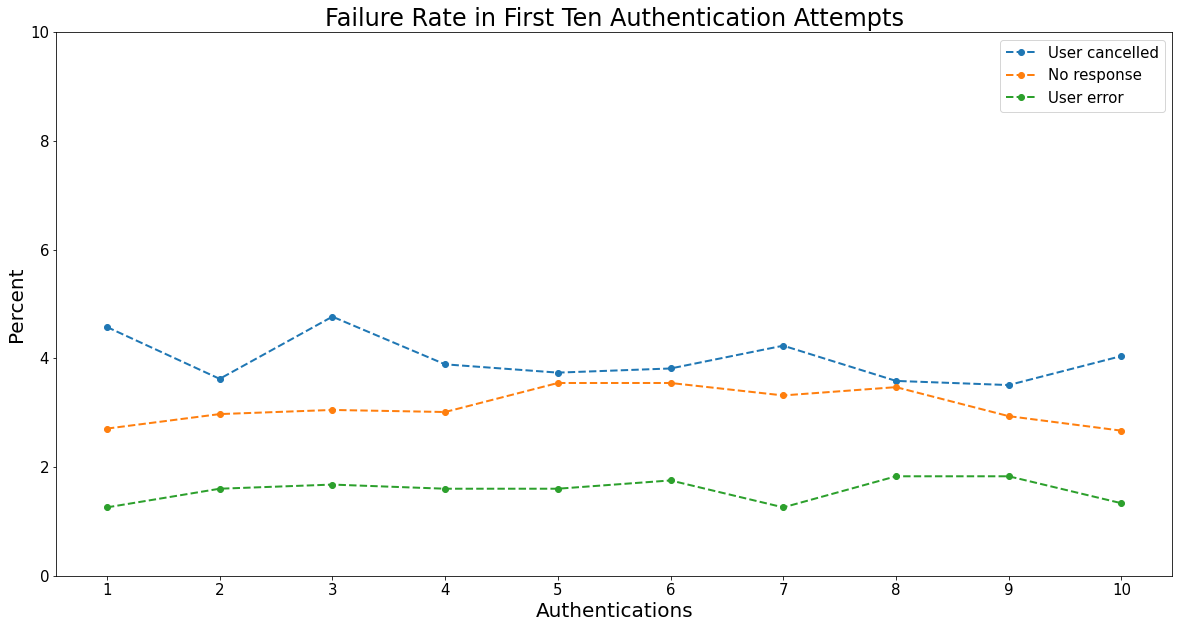

In [39]:
ax = (enrrollmentResults.iloc[:,1:].div(totalEnrollmentUsers)*100).rename({}).plot(ls = 'dashed', lw = 2, marker = 'o')
plt.title('Failure Rate in First Ten Authentication Attempts', fontsize=24)
plt.ylabel('Percent', fontsize=20)
plt.xlabel('Authentications', fontsize=20)

plt.ylim(0,10)

plt.yticks(fontsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10], fontsize=15)


ax.legend(fontsize=15)

plt.savefig('enrollmentFailures.png')
plt.show()
# plt.rcParams["figure.figsize"] = (20,10)

In [32]:
# Get Error Rate by month

In [33]:
# Get user failures 

In [63]:
users_logs_by_month = logs[(logs['month']!=5) & (logs['Result']=="FAILURE")][["month","Result","Reason"]]

In [64]:
users_logs_by_month.head()

month   Result          Reason
10      4  FAILURE     No response
14      4  FAILURE     No response
33      4  FAILURE  User cancelled
68      4  FAILURE     No response
84      4  FAILURE  User cancelled

In [65]:
def label_failure(value):
    if(value=="User cancelled"):
        return "User cancelled"
    elif(value=="No response"):
        return "No response"
    elif(value=="User mistake"):
        return "User mistake"
    elif(value=="User mistake"):
        return "user mistake"
    else:
        return "User error"

In [66]:
users_logs_by_month['label'] = users_logs_by_month['Reason'].apply(lambda value: label_failure(value))

In [67]:
users_logs_by_month = users_logs_by_month[users_logs_by_month["Reason"]!="Invalid device"]

In [68]:
users_logs_by_month = users_logs_by_month[users_logs_by_month["Reason"]!="User is disabled"]

In [69]:
users_logs_by_month.Reason.value_counts()

User cancelled      158489
No response         144498
Invalid passcode     19496
No keys pressed       7167
Call timed out        5359
User mistake          3222
Locked out             675
Error                   29
Name: Reason, dtype: int64

In [70]:
users_logs_by_month.head()

month   Result          Reason           label
10      4  FAILURE     No response     No response
14      4  FAILURE     No response     No response
33      4  FAILURE  User cancelled  User cancelled
68      4  FAILURE     No response     No response
84      4  FAILURE  User cancelled  User cancelled

In [71]:
userLogErrors = users_logs_by_month[['Reason','label','month']].groupby(["month","label"]).count().unstack(level=1)

In [72]:
userLogErrors.columns = userLogErrors.columns.droplevel()

In [73]:
# get total authentcations per month
userLogErrors["totalAuthentications"] = logs[['Result','month']].groupby(["month"]).count()

In [74]:
userLogErrors

label  No response  User cancelled  User error  User mistake  \
month                                                          
1            27105           27043        5895           522   
2            22626           26529        4870           546   
3            20313           24115        4650           539   
4            23222           26484        5174           574   
11           27837           31365        7352           578   
12           23395           22953        4785           463   

label  totalAuthentications  
month                        
1                   1077619  
2                   1251683  
3                   1121683  
4                   1283697  
11                  1309930  
12                  1019908

In [75]:
chartOfUsersFailures = userLogErrors.iloc[:,:4].div(userLogErrors.totalAuthentications, axis=0)

In [76]:
chartOfUsersFailures.drop(columns=["User mistake"], inplace=True)

In [85]:
chartOfUsersFailures*100

label    No response  User cancelled  User error
month                                           
2020-11     2.125075        2.394403    0.561251
2020-12     2.293834        2.250497    0.469160
2021-01     2.515267        2.509514    0.547039
2021-02     1.807646        2.119466    0.389076
2021-03     1.810939        2.149894    0.414556
2021-04     1.808994        2.063104    0.403055

In [78]:
new_index = [11,12,1,2,3,4]
chartOfUsersFailures = chartOfUsersFailures.reindex(new_index)

In [79]:
chartOfUsersFailures = chartOfUsersFailures.rename(index={11: '2020-11', 12: '2020-12', 1: '2021-01', 2: '2021-02', 3: '2021-03', 4: '2021-04'})

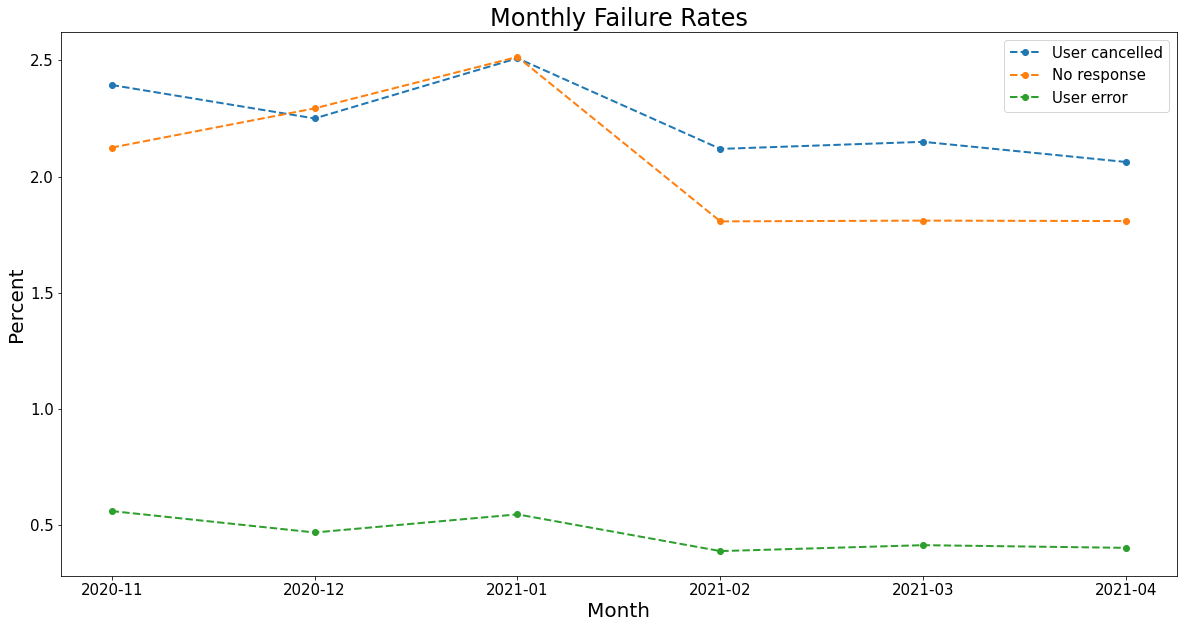

In [228]:
ax = (chartOfUsersFailures[["User cancelled","No response","User error"]]*100).plot(ls = 'dashed', lw = 2, marker = 'o')
plt.title('Monthly Failure Rates', fontsize=24)
plt.ylabel('Percent', fontsize=20)
plt.xlabel("Month",fontsize=20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax.legend(fontsize=15)

plt.savefig('monthlyFailures.png')
plt.show()

In [31]:
userErrorRate = logs[['Alias','Result','Reason']].groupby(['Alias','Result']).size().reset_index(name='counts')

In [32]:
userQuantifiedLogs = userErrorRate.pivot(index='Alias',columns='Result',values='counts').drop(columns=['FRAUD'])

In [33]:
print(userQuantifiedLogs.columns)

Index(['FAILURE', 'SUCCESS'], dtype='object', name='Result')


In [34]:
userQuantifiedLogs.drop(["Unenrolled_User","User_Not_Found"], inplace=True)

In [35]:
userQuantifiedLogs.head()

Result       FAILURE  SUCCESS
Alias                        
user_000001      7.0    177.0
user_000002      2.0    498.0
user_000003     31.0    374.0
user_000004      7.0    307.0
user_000005      6.0    448.0

In [36]:
userQuantifiedLogs['FAILURE'] = userQuantifiedLogs['FAILURE'].fillna(0)

In [37]:
userQuantifiedLogs['SUCCESS'] = userQuantifiedLogs['SUCCESS'].fillna(0)

In [38]:
userQuantifiedLogs['failureRate'] = userQuantifiedLogs['FAILURE'] / (userQuantifiedLogs['SUCCESS'] + userQuantifiedLogs['FAILURE'])

In [39]:
userQuantifiedLogs.sort_values(by='failureRate', inplace=True)

In [40]:
userQuantifiedLogs.insert(0,'New_ID', range(1, len(userQuantifiedLogs)+1))

In [41]:
userQuantifiedLogs.head()

Result       New_ID  FAILURE  SUCCESS  failureRate
Alias                                             
user_039685       1      0.0      2.0          0.0
user_053508       2      0.0      3.0          0.0
user_055805       3      0.0      7.0          0.0
user_015736       4      0.0     63.0          0.0
user_015730       5      0.0     55.0          0.0

In [124]:
userQuantifiedLogs.tail()

Result       New_ID  FAILURE  SUCCESS  failureRate
Alias                                             
user_001686   50958      1.0      0.0          1.0
user_009491   50959      1.0      0.0          1.0
user_004423   50960      2.0      0.0          1.0
user_043238   50961      1.0      0.0          1.0
user_024419   50962      1.0      0.0          1.0

In [125]:
userQuantifiedLogs['userPercentage'] = userQuantifiedLogs['New_ID'].apply(lambda num: num/len(userQuantifiedLogs))

In [126]:
userQuantifiedLogs.shape

(50962, 5)

In [127]:
a = userQuantifiedLogs[['failureRate']].groupby('failureRate').size().to_frame('frequency')

In [128]:
a['CF']  = (a.frequency.cumsum() / userQuantifiedLogs.shape[0])*100

In [129]:
a.reset_index(inplace=True)

In [130]:
a["failureRate"] = a["failureRate"]*100

In [139]:
a.describe()

failureRate     frequency           CF
count  6554.000000   6554.000000  6554.000000
mean      9.939501      7.775709    64.510638
std      12.021298    132.402767    24.718001
min       0.000000      1.000000    20.852792
25%       2.301322      1.000000    42.618520
50%       5.910748      2.000000    68.986696
75%      12.817864      4.000000    87.086947
max     100.000000  10627.000000   100.000000

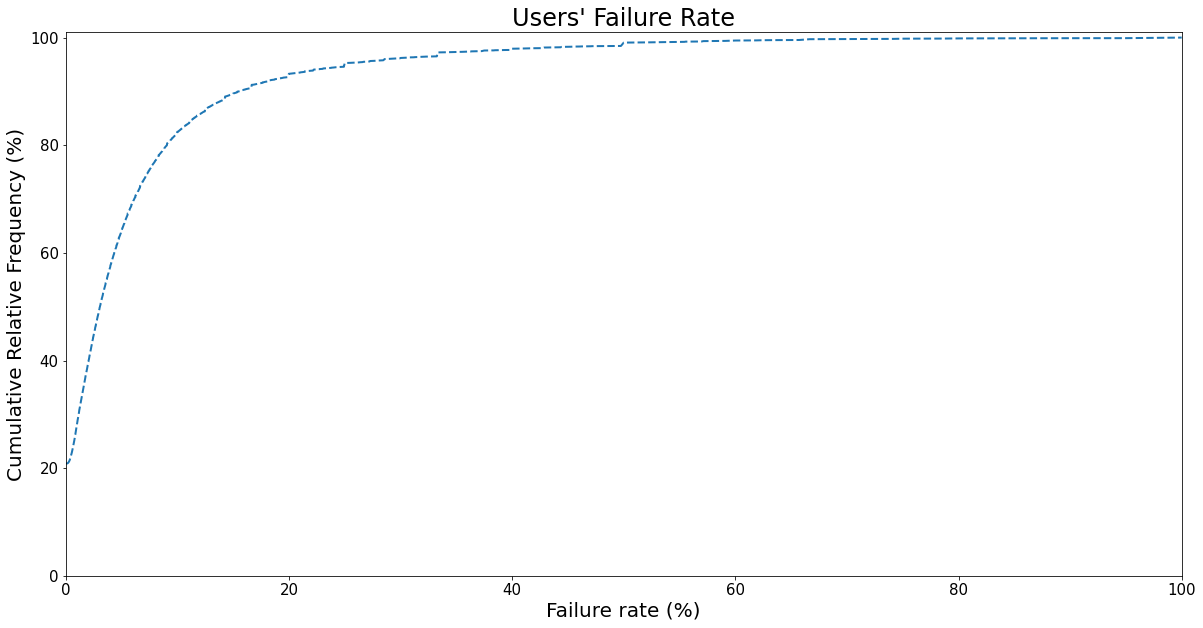

In [235]:
ax = a.plot(x='failureRate', y='CF', legend=False, ls = '--', lw = 2,)
plt.ylabel('Cumulative Relative Frequency (%)', fontsize=20)
plt.xlabel('Failure rate (%)', fontsize=20)
plt.xlim(0,100)
plt.title("Users' Failure Rate", fontsize=24)


plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylim(0,101)

plt.savefig('failureRates.png')
plt.show()

In [105]:
userQuantifiedLogs['failureRate'].describe()

count    50962.000000
mean         0.063682
std          0.102151
min          0.000000
25%          0.007576
50%          0.030675
75%          0.073864
max          1.000000
Name: failureRate, dtype: float64

In [198]:
factorLogs = logs[["Factor","Result","Reason"]].groupby(["Factor","Result"]).count().unstack(level=1)

In [199]:
factorLogs

Reason                 
Result                    FAILURE FRAUD    SUCCESS
Factor                                            
Bypass Code                 247.0   NaN     1425.0
Bypass Status                 NaN   NaN     2964.0
Duo Mobile Passcode        3886.0   NaN   256604.0
Duo Push                 127936.0  85.0  4200931.0
Hardware Token               40.0   NaN   101030.0
Passcode                  15349.0   NaN        NaN
Phone Call                32657.0   NaN   804138.0
Remembered Device             NaN   NaN  1287334.0
Security Key (WebAuthn)       NaN   NaN     3949.0
Touch ID (WebAuthn)           NaN   NaN    21755.0
U2F Token                     NaN   NaN    17589.0
Yubikey Passcode              8.0   NaN      460.0

In [200]:
factorLogs.columns = factorLogs.columns.droplevel()

In [201]:
factorLogs.drop(columns='FRAUD', inplace=True)

In [202]:
factorLogs.fillna(0, inplace=True)

In [203]:
factorLogs['failurePercent'] = (factorLogs['FAILURE'] / (factorLogs['FAILURE'] + factorLogs['SUCCESS']))*100

In [204]:
factorLogs['SucessPercent'] = (factorLogs['SUCCESS'] / (factorLogs['FAILURE'] + factorLogs['SUCCESS']))*100

In [205]:
# COMBINE ALL PASSCODES INTO ONE

In [206]:
passCodeFailure = factorLogs.loc['Bypass Code']['FAILURE'] + factorLogs.loc['Duo Mobile Passcode']['FAILURE'] + factorLogs.loc['Hardware Token']['FAILURE'] + factorLogs.loc['Passcode']['FAILURE'] + factorLogs.loc['Yubikey Passcode']['FAILURE']

In [207]:
passCodeSucess = factorLogs.loc['Bypass Code']['SUCCESS'] + factorLogs.loc['Duo Mobile Passcode']['SUCCESS'] + factorLogs.loc['Hardware Token']['SUCCESS'] + factorLogs.loc['Passcode']['SUCCESS'] + factorLogs.loc['Yubikey Passcode']['SUCCESS']

In [208]:
securityKeyFailure = factorLogs.loc['Security Key (WebAuthn)']['FAILURE'] + factorLogs.loc['U2F Token']['FAILURE']

In [209]:
securityKeySucess = factorLogs.loc['Security Key (WebAuthn)']['SUCCESS'] + factorLogs.loc['U2F Token']['SUCCESS']

In [210]:
factorLogs.loc['Security Key'] = [securityKeyFailure, securityKeySucess, (securityKeyFailure/(securityKeySucess+securityKeyFailure))*100, (securityKeySucess/(securityKeySucess+securityKeyFailure))*100]

In [211]:
factorLogs.drop(["Security Key (WebAuthn)"], inplace=True)

In [212]:
factorLogs.drop(["U2F Token"], inplace=True)

In [213]:
factorLogs.drop(["Passcode"], inplace=True)

In [214]:
factorLogs

Result                FAILURE    SUCCESS  failurePercent  SucessPercent
Factor                                                                 
Bypass Code             247.0     1425.0       14.772727      85.227273
Bypass Status             0.0     2964.0        0.000000     100.000000
Duo Mobile Passcode    3886.0   256604.0        1.491804      98.508196
Duo Push             127936.0  4200931.0        2.955415      97.044585
Hardware Token           40.0   101030.0        0.039577      99.960423
Phone Call            32657.0   804138.0        3.902628      96.097372
Remembered Device         0.0  1287334.0        0.000000     100.000000
Touch ID (WebAuthn)       0.0    21755.0        0.000000     100.000000
Yubikey Passcode          8.0      460.0        1.709402      98.290598
Security Key              0.0    21538.0        0.000000     100.000000

In [215]:
factorLogs.loc['Passcode'] = [passCodeFailure, passCodeSucess, (passCodeFailure/(passCodeSucess+passCodeFailure))*100, (passCodeSucess/(passCodeSucess+passCodeFailure))*100]

In [216]:
# get rid of authentications that are not 2fa 

In [217]:
factorLogs.drop(['Bypass Status',"Remembered Device"], inplace=True)

In [218]:
# drop all factors that are code related

In [219]:
factorLogs.drop(['Bypass Code','Duo Mobile Passcode','Hardware Token','Yubikey Passcode'], inplace=True)

In [220]:
factorLogs.sort_values(by="failurePercent", inplace=True)

In [221]:
factorLogs["failurePercent"] = round(factorLogs["failurePercent"],1)

In [222]:
factorLogs.iloc[:,2:]

Result               failurePercent  SucessPercent
Factor                                            
Touch ID (WebAuthn)             0.0     100.000000
Security Key                    0.0     100.000000
Duo Push                        3.0      97.044585
Phone Call                      3.9      96.097372
Passcode                        5.2      94.847632

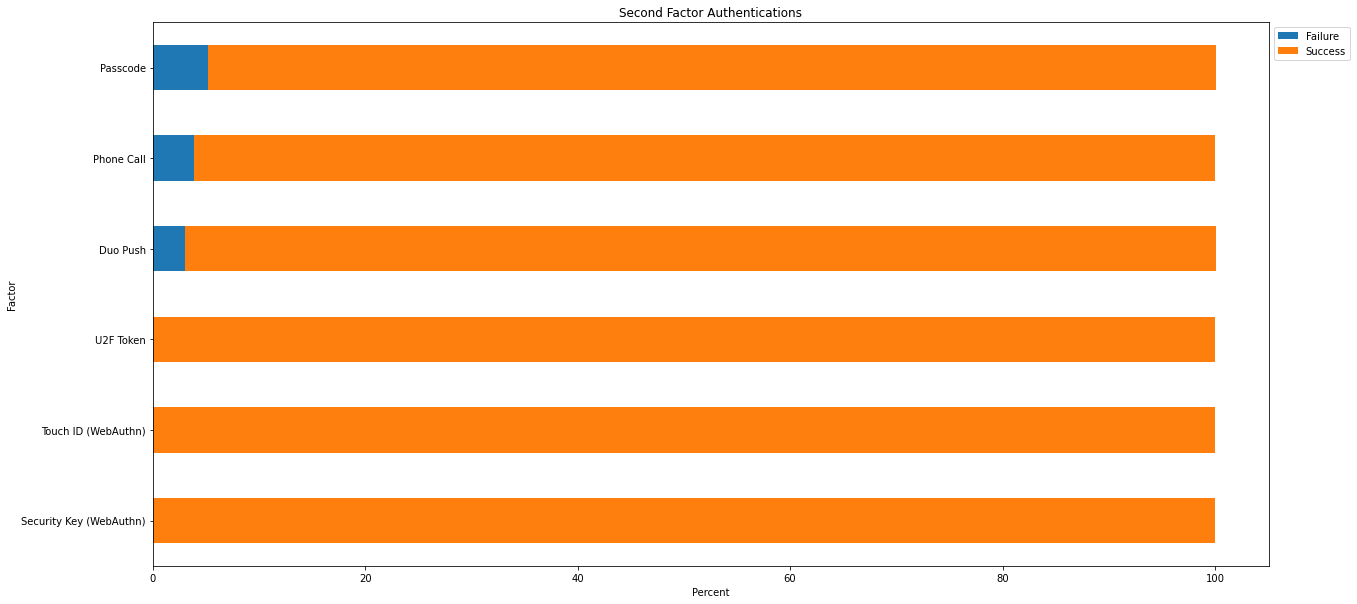

In [174]:
plt.rcParams["figure.figsize"] = (20,10)
ax = factorLogs.iloc[:,2:].plot.barh(stacked=True)
plt.ylabel('Factor')
plt.xlabel('Percent')
plt.title('Second Factor Authentications')
mylabels= ["Failure","Success"]
ax.legend(labels=mylabels, bbox_to_anchor=(1.0, 1.0))
# for i, v in enumerate(factorLogs["failurePercent"]):
#     if(v==0):
#         ax.text(v + 100, i-.1, str(v) + "%", color='blue')
#     else:
#         ax.text(v + 85, i-.1, str(v) + "%", color='blue')
        


plt.show()


In [223]:
factorLogs.head()

Result                FAILURE    SUCCESS  failurePercent  SucessPercent
Factor                                                                 
Touch ID (WebAuthn)       0.0    21755.0             0.0     100.000000
Security Key              0.0    21538.0             0.0     100.000000
Duo Push             127936.0  4200931.0             3.0      97.044585
Phone Call            32657.0   804138.0             3.9      96.097372
Passcode              19530.0   359519.0             5.2      94.847632

In [224]:
factorLogs['FAILURE'] + factorLogs['SUCCESS']

Factor
Touch ID (WebAuthn)      21755.0
Security Key             21538.0
Duo Push               4328867.0
Phone Call              836795.0
Passcode                379049.0
dtype: float64

In [12]:
logs.shape

(7077783, 16)

In [16]:
logs.head()

Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   
2 2021-04-01 07:00:11.738361+00:00  user_013462  Single Sign-On  Phone Call   
3 2021-04-01 07:00:25.203564+00:00  user_025756  Single Sign-On    Duo Push   
4 2021-04-01 07:00:27.389194+00:00  user_030286  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   
2  SUCCESS  User approved       False                    US   
3  SUCCESS  User approved       False                    US   
4  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   
2          California      San Francisco                    NaN  2021-04-01   
3          California               Lodi                    NaN  2021-04-01   
4          California            Antioch                    NaN  2021-04-01   

   month  hour  minute  second  
0      4     7       0       7  
1      4     7       0      10  
2      4     7       0      11  
3      4     7       0      25  
4      4     7       0      27

In [17]:
logs.Factor.value_counts()

Duo Push                   4328952
Remembered Device          1287334
Phone Call                  836917
Duo Mobile Passcode         260490
Hardware Token              101070
Touch ID (WebAuthn)          21986
U2F Token                    17607
Passcode                     15349
Security Key (WebAuthn)       3978
Bypass Status                 2964
Bypass Code                   1672
Yubikey Passcode               468
Name: Factor, dtype: int64

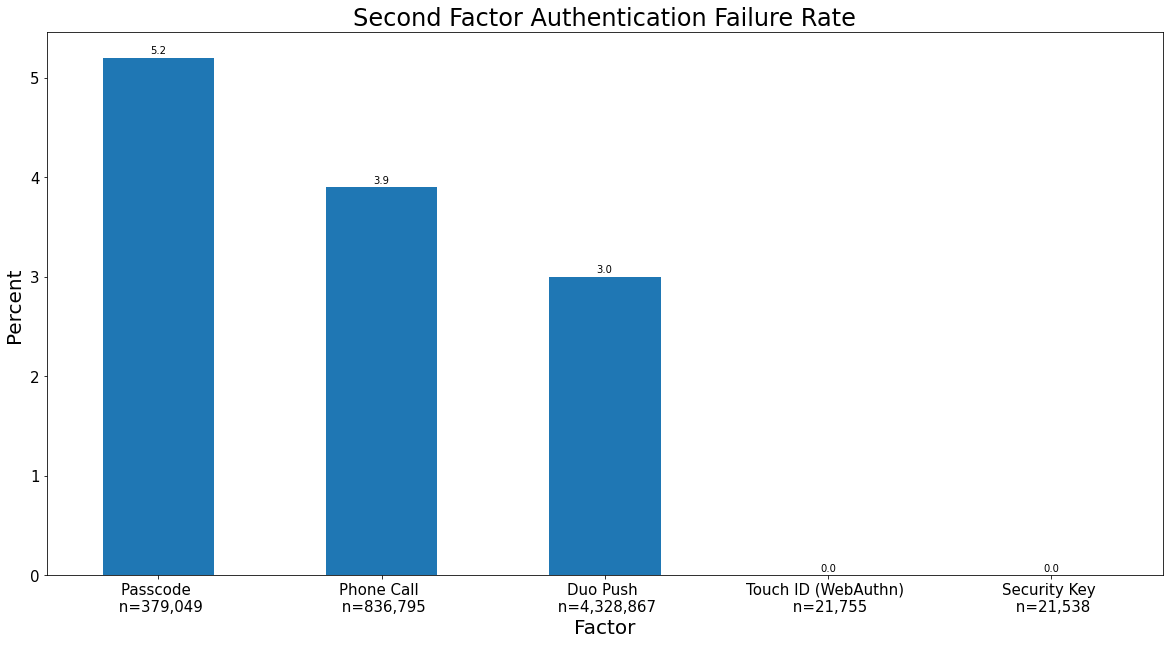

In [238]:
plt.rcParams["figure.figsize"] = (20,10)
ax = factorLogs['failurePercent'].sort_values(ascending=False).rename(index={"Passcode": 'Passcode \n n=379,049',
                                                                            "Phone Call": 'Phone Call \n n=836,795',
                                                                            "Duo Push": 'Duo Push \n n=4,328,867',
                                                                            "Security Key (WebAuthn)": 'Security Key (WebAuthn) \n n=3,949',
                                                                            "Touch ID (WebAuthn)": 'Touch ID (WebAuthn) \n n=21,755',
                                                                            "Security Key": 'Security Key \n n=21,538'}).plot.bar(stacked=True, rot=0, legend=False)
plt.ylabel('Percent ', fontsize=20)
plt.xlabel('Factor', fontsize=20)
plt.title('Second Factor Authentication Failure Rate', fontsize=24)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
mylabels= ["Failure","Success"]

rects = ax.patches    
    
labels = factorLogs['failurePercent'].sort_values(ascending=False)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .02, label, ha="center", va="bottom")
    
plt.savefig('factorFailureRates.png')
plt.show()

In [225]:
factorsBeingUsed = logs.reset_index()[['Factor','Description','Reason','Alias']]
factorsBeingUsed.head()

KeyError: "['Description'] not in index"

In [187]:
factorUsage = factorsBeingUsed.groupby(['Description','Factor','Alias']).count().unstack(level=2).count(axis=1).reset_index()

In [188]:
def computePercentageOfGroup(row):
    if(row['Description']=='Active (Faculty)'):
        return round((row[0] / 1773) * 100, 1)
    elif(row['Description']=='Active (Staff)'):
        return round((row[0] / 1179) * 100, 1)
    elif(row['Description']=='Active (Student)'):
        return round((row[0] / 32931) * 100, 1)

In [189]:
factorUsage['percentOfPopulation'] = factorUsage.apply(lambda row: computePercentageOfGroup(row), axis=1)

In [211]:
factorUsageResult = factorUsage.set_index(['Description','Factor'])['percentOfPopulation'].unstack(level=1).transpose().fillna(0).sort_values(by='Active (Student)', ascending=False)
factorUsageResult.drop('Passcode', inplace=True)


Description              Active (Faculty)  Active (Staff)  Active (Student)
Factor                                                                     
Duo Push                             72.3            68.7              87.7
Remembered Device                    58.0            68.8              55.2
Phone Call                           41.2            45.5              39.1
Duo Mobile Passcode                  16.0            11.0              20.8
Touch ID (WebAuthn)                   0.2             0.2               1.1
Bypass Code                           0.5             0.8               0.6
Hardware Token                       14.4            28.6               0.6
Bypass Status                         0.2             0.0               0.1
Security Key (WebAuthn)               2.0             0.9               0.0
U2F Token                             3.9             2.5               0.0
Yubikey Passcode                      0.0             0.1               0.0

In [212]:
factorUsageResult

Description              Active (Faculty)  Active (Staff)  Active (Student)
Factor                                                                     
Duo Push                             72.3            68.7              87.7
Remembered Device                    58.0            68.8              55.2
Phone Call                           41.2            45.5              39.1
Duo Mobile Passcode                  16.0            11.0              20.8
Touch ID (WebAuthn)                   0.2             0.2               1.1
Bypass Code                           0.5             0.8               0.6
Hardware Token                       14.4            28.6               0.6
Bypass Status                         0.2             0.0               0.1
Security Key (WebAuthn)               2.0             0.9               0.0
U2F Token                             3.9             2.5               0.0
Yubikey Passcode                      0.0             0.1               0.0

In [144]:
factorLogs = logs[['Factor','Result','month']]

In [146]:
factorLogs = factorLogs[factorLogs["Result"]=="SUCCESS"]

In [147]:
factorLogs.head()

Factor   Result  month
0  Phone Call  SUCCESS      4
1    Duo Push  SUCCESS      4
2  Phone Call  SUCCESS      4
3    Duo Push  SUCCESS      4
4    Duo Push  SUCCESS      4

In [153]:
factorLogs = factorLogs.groupby(["month","Factor"]).count().unstack(level=1)

In [159]:
factorLogs.columns = factorLogs.columns.droplevel()

In [161]:
factorLogs["totalLogs"] = factorLogs.sum(axis=1)

In [177]:
new_index = [11,12,1,2,3,4]
factorLogs = factorLogs.reindex(new_index)
factorLogs = factorLogs.rename(index={11: '2020-11', 12: '2020-12', 1: '2021-01', 2: '2021-02', 3: '2021-03', 4: '2021-04'})

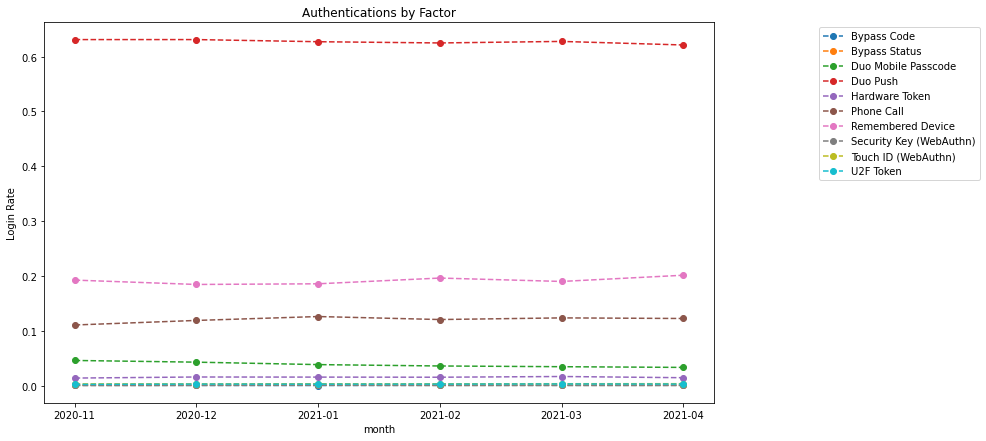

In [184]:
factorLogs.iloc[:,:10].div(factorLogs.totalLogs, axis=0).plot(ls = '--', lw = 1.5, marker = 'o')
plt.title('Authentications by Factor')
plt.ylabel('Login Rate')
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.show()

In [ ]:
# updatedRT, or allOfUsersRecoveryTime

Recovery

In [140]:
y = pd.read_csv('allOfUsersRecoveryTime.csv')

In [141]:
totalUsers = y.shape[0]

In [142]:
y['recovery_time'] = y['recovery_time'].astype(int)

In [143]:
y.head()

user  recovery_time  max_recovery_time  median_recovery_time
0  user_000001             19          32.362844             16.047631
1  user_000002          30067       59074.926732          30067.634786
2  user_000003            345        8088.079477             22.802703
3  user_000004              5           9.436075              4.497945
4  user_000005            164         673.742819             25.538759

In [144]:
y.sort_values(by='recovery_time', inplace=True)

In [145]:
y.head()

user  recovery_time  max_recovery_time  median_recovery_time
34147  user_037124              0                NaN                   NaN
47997  user_054419              0                NaN                   NaN
9005   user_009706              0                NaN                   NaN
40207  user_046145              0                NaN                   NaN
40216  user_046154              0                NaN                   NaN

In [146]:
y = y[['recovery_time']].groupby('recovery_time').size().to_frame('frequency')

In [147]:
y['CF']  = (y.frequency.cumsum() / userQuantifiedLogs.shape[0])*100

In [148]:
y.reset_index(inplace=True)

In [149]:
y.head()

recovery_time  frequency         CF
0              0      10849  21.288411
1              1         10  21.308033
2              2         13  21.333543
3              3        133  21.594521
4              4        333  22.247949

In [152]:
y

recovery_time  frequency          CF
0                  0      10849   21.288411
1                  1         10   21.308033
2                  2         13   21.333543
3                  3        133   21.594521
4                  4        333   22.247949
5                  5        381   22.995565
6                  6        370   23.721596
7                  7        436   24.577136
8                  8        483   25.524901
9                  9        520   26.545269
10                10        463   27.453789
11                11        484   28.403516
12                12        468   29.321848
13                13        454   30.212708
14                14        431   31.058436
15                15        436   31.913975
16                16        402   32.702798
17                17        378   33.444527
18                18        354   34.139163
19                19        301   34.729799
20                20        297   35.312586
21                21        284   35.869864
22                22        304   36.466387
23                23        253   36.962835
24                24        268   37.488717
25                25        262   38.002826
26                26        247   38.487500
27                27        219   38.917232
28                28        224   39.356776
29                29        195   39.739414
30                30        189   40.110278
31                31        174   40.451709
32                32        164   40.773518
33                33        178   41.122797
34                34        161   41.438719
35                35        144   41.721283
36                36        156   42.027393
37                37        140   42.302107
38                38        130   42.557199
39                39        150   42.851536
40                40        130   43.106628
41                41        107   43.316589
42                42        127   43.565794
43                43        120   43.801264
44                44        114   44.024960
45                45         98   44.217260
46                46        106   44.425258
47                47        119   44.658765
48                48         92   44.839292
49                49         96   45.027668
50                50         96   45.216043
51                51         95   45.402457
52                52         96   45.590832
53                53         81   45.749774
54                54         80   45.906754
55                55         82   46.067658
56                56         78   46.220713
57                57         85   46.387504
58                58         77   46.538597
59                59         91   46.717162
60                60         94   46.901613
61                61         60   47.019348
62                62         64   47.144932
63                63         67   47.276402
64                64         65   47.403948
65                65         67   47.535419
66                66         70   47.672776
67                67         58   47.786586
68                68         72   47.927868
69                69         41   48.008320
70                70         59   48.124092
71                71         55   48.232016
72                72         49   48.328166
73                73         79   48.483184
74                74         49   48.579334
75                75         61   48.699031
76                76         42   48.781445
77                77         62   48.903104
78                78         50   49.001217
79                79         47   49.093442
80                80         42   49.175857
81                81         55   49.283780
82                82         45   49.372081
83                83         41   49.452533
84                84         41   49.532985
85                85         52   49.635022
86                86         51   49.735097
87                87         44   49.821436
88                88         36   49.892076
89                89         38   49.966642
90 

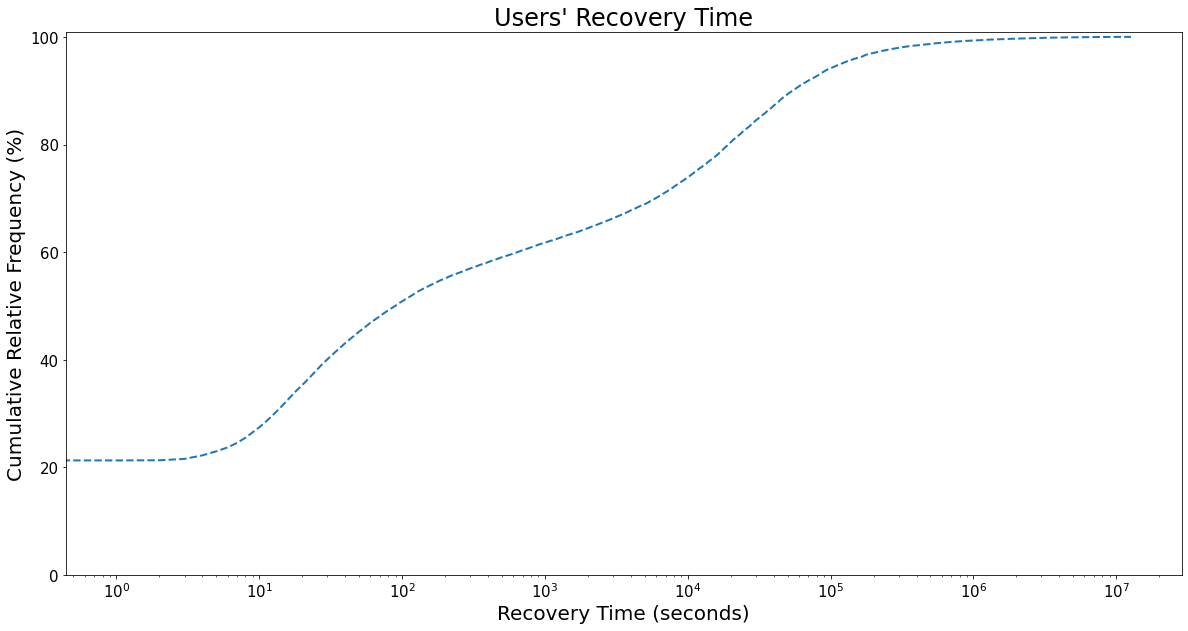

In [240]:
plt.rcParams["figure.figsize"] = (20,10)
# 
ax = y.plot(x='recovery_time', y='CF', legend=False, ls = '--', lw = 2,)
plt.ylabel('Cumulative Relative Frequency (%)', fontsize=20)
plt.xlabel('Recovery Time (seconds)', fontsize=20)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.set_xscale('log')

# ax.set_xticks([1, 10])

plt.ylim(0,101)

plt.title("Users' Recovery Time", fontsize=24)
plt.savefig('recoveryTime.png')
plt.show()


In [280]:
y['recovery_time'].describe().apply(lambda x: format(x, 'f'))

count       50962.000000
mean        39431.412935
std        279909.019763
min             0.000000
25%             8.000000
50%            90.000000
75%         11367.750000
max      12694905.000000
Name: recovery_time, dtype: object

In [282]:
logs.shape

(7077783, 16)

In [33]:
logs.head()

Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   
2 2021-04-01 07:00:11.738361+00:00  user_013462  Single Sign-On  Phone Call   
3 2021-04-01 07:00:25.203564+00:00  user_025756  Single Sign-On    Duo Push   
4 2021-04-01 07:00:27.389194+00:00  user_030286  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   
2  SUCCESS  User approved       False                    US   
3  SUCCESS  User approved       False                    US   
4  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   
2          California      San Francisco                    NaN  2021-04-01   
3          California               Lodi                    NaN  2021-04-01   
4          California            Antioch                    NaN  2021-04-01   

   month  hour  minute  second  Day  
0      4     7       0       7  Thu  
1      4     7       0      10  Thu  
2      4     7       0      11  Thu  
3      4     7       0      25  Thu  
4      4     7       0      27  Thu

In [27]:
userLoginTimes = logs.groupby("Alias").size()

In [28]:
userLoginTimes.head()

Alias
Unenrolled_User    11978
User_Not_Found      9134
user_000001          184
user_000002          500
user_000003          405
dtype: int64

In [29]:
i = userLoginTimes.to_dict()

In [42]:
corrOfErrorRateAndLoginTimes = userQuantifiedLogs

In [43]:
corrOfErrorRateAndLoginTimes.reset_index(inplace=True)

In [44]:
corrOfErrorRateAndLoginTimes.head()

Result        Alias  New_ID  FAILURE  SUCCESS  failureRate
0       user_039685       1      0.0      2.0          0.0
1       user_053508       2      0.0      3.0          0.0
2       user_055805       3      0.0      7.0          0.0
3       user_015736       4      0.0     63.0          0.0
4       user_015730       5      0.0     55.0          0.0

In [45]:
corrOfErrorRateAndLoginTimes["login_times"] = corrOfErrorRateAndLoginTimes["Alias"].map(i)

In [46]:
corrOfErrorRateAndLoginTimes.head()

Result        Alias  New_ID  FAILURE  SUCCESS  failureRate  login_times
0       user_039685       1      0.0      2.0          0.0            2
1       user_053508       2      0.0      3.0          0.0            3
2       user_055805       3      0.0      7.0          0.0            7
3       user_015736       4      0.0     63.0          0.0           63
4       user_015730       5      0.0     55.0          0.0           55

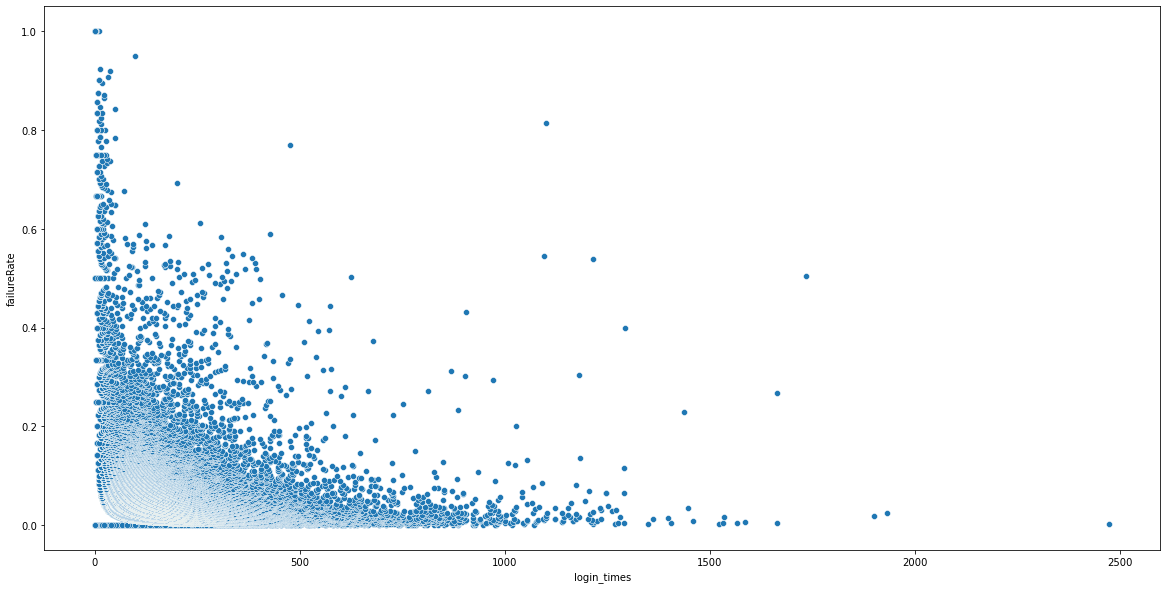

In [48]:
sns.scatterplot(x=corrOfErrorRateAndLoginTimes["login_times"], y=corrOfErrorRateAndLoginTimes["failureRate"])
plt.show()

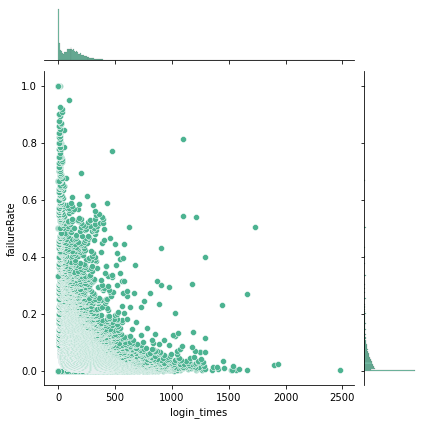

In [50]:
sns.jointplot(x=corrOfErrorRateAndLoginTimes["login_times"], y=corrOfErrorRateAndLoginTimes["failureRate"], color="#4CB391")

In [51]:
corrOfErrorRateAndLoginTimes[["login_times","failureRate"]].corr()

Result       login_times  failureRate
Result                               
login_times      1.00000     -0.15178
failureRate     -0.15178      1.00000

In [76]:
u = users[["Alias","Description"]].set_index("Alias").T.to_dict('list')

In [79]:
u["user_000001"]

'Active (Staff)'

In [81]:
logs = logs[logs.Alias!="Unenrolled_User"]

In [83]:
logs = logs[logs.Alias!="User_Not_Found"]

In [84]:
logs['Description'] = logs.Alias.apply(lambda alias: u[alias][0])

In [89]:
uErrorRate = logs[['Alias',"Description",'Result','Reason']].groupby(['Alias',"Description",'Result']).size().reset_index(name='counts')


In [90]:
uErrorRate.head()

Alias     Description   Result  counts
0  user_000001  Active (Staff)  FAILURE       7
1  user_000001  Active (Staff)  SUCCESS     177
2  user_000002  Active (Staff)  FAILURE       2
3  user_000002  Active (Staff)  SUCCESS     498
4  user_000003  Active (Staff)  FAILURE      31

In [94]:
userQuantLogs = uErrorRate.pivot(index='Alias',columns='Result',values='counts').drop(columns=['FRAUD'])

print(userQuantLogs.columns)

Index(['FAILURE', 'SUCCESS'], dtype='object', name='Result')


In [95]:
userQuantLogs.head()

Result       FAILURE  SUCCESS
Alias                        
user_000001      7.0    177.0
user_000002      2.0    498.0
user_000003     31.0    374.0
user_000004      7.0    307.0
user_000005      6.0    448.0

In [98]:
# userQuantLogs.drop(["Unenrolled_User","User_Not_Found"], inplace=True)

userQuantLogs['FAILURE'] = userQuantLogs['FAILURE'].fillna(0)

userQuantLogs['SUCCESS'] = userQuantLogs['SUCCESS'].fillna(0)

userQuantLogs['failureRate'] = userQuantLogs['FAILURE'] / (userQuantLogs['SUCCESS'] + userQuantLogs['FAILURE'])


In [100]:
userQuantLogs.reset_index(inplace=True)

In [102]:
userQuantLogs["Description"] = userQuantLogs["Alias"].apply(lambda name: u[name][0])

In [103]:
userQuantLogs.head()

Result        Alias  FAILURE  SUCCESS  failureRate     Description
0       user_000001      7.0    177.0     0.038043  Active (Staff)
1       user_000002      2.0    498.0     0.004000  Active (Staff)
2       user_000003     31.0    374.0     0.076543  Active (Staff)
3       user_000004      7.0    307.0     0.022293  Active (Staff)
4       user_000005      6.0    448.0     0.013216  Active (Staff)

In [104]:
mask1 = userQuantLogs["Description"] == "Active (Student)"
mask2 = userQuantLogs["Description"] == "Active (Faculty)"
mask3 = userQuantLogs["Description"] == "Active (Staff)"

In [105]:
subsetOfUsers = userQuantLogs[(mask1) | (mask2) | (mask3)]
subsetOfUsers.Description.value_counts()

Active (Student)    32931
Active (Faculty)     1773
Active (Staff)       1179
Name: Description, dtype: int64

In [106]:
subsetOfUsers.head()

Result        Alias  FAILURE  SUCCESS  failureRate     Description
0       user_000001      7.0    177.0     0.038043  Active (Staff)
1       user_000002      2.0    498.0     0.004000  Active (Staff)
2       user_000003     31.0    374.0     0.076543  Active (Staff)
3       user_000004      7.0    307.0     0.022293  Active (Staff)
4       user_000005      6.0    448.0     0.013216  Active (Staff)

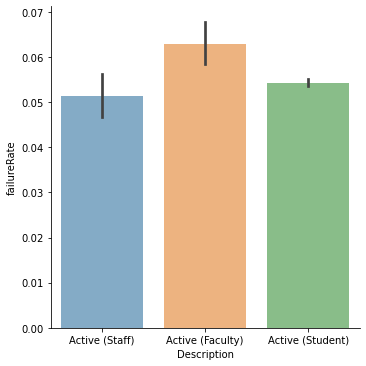

In [155]:
sns.catplot(
    data=subsetOfUsers, kind="bar",
    x="Description", y="failureRate", alpha=.6,)
plt.show()

In [114]:
x = subsetOfUsers[["failureRate","Description"]].set_index("Description")

In [127]:
subsetOfUsers[subsetOfUsers["Description"]=='Active (Staff)']["failureRate"].head()

0    0.038043
1    0.004000
2    0.076543
3    0.022293
4    0.013216
Name: failureRate, dtype: float64

In [135]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [136]:
f_oneway(subsetOfUsers[subsetOfUsers["Description"]=='Active (Staff)']["failureRate"], 
                                subsetOfUsers[subsetOfUsers["Description"]=='Active (Faculty)']["failureRate"], 
                                subsetOfUsers[subsetOfUsers["Description"]=='Active (Student)']["failureRate"])

F_onewayResult(statistic=11.895104793522735, pvalue=6.850677433073043e-06)

In [137]:
tukey = pairwise_tukeyhsd(endog=subsetOfUsers['failureRate'],
                          groups=subsetOfUsers['Description'],
                          alpha=0.05)

In [138]:
#display results
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Active (Faculty)   Active (Staff)  -0.0115  0.001 -0.0182 -0.0048   True
Active (Faculty) Active (Student)  -0.0086  0.001  -0.013 -0.0043   True
  Active (Staff) Active (Student)   0.0029 0.4155 -0.0024  0.0081  False
------------------------------------------------------------------------


In [170]:
logs.groub

Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   
2 2021-04-01 07:00:11.738361+00:00  user_013462  Single Sign-On  Phone Call   
3 2021-04-01 07:00:25.203564+00:00  user_025756  Single Sign-On    Duo Push   
4 2021-04-01 07:00:27.389194+00:00  user_030286  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   
2  SUCCESS  User approved       False                    US   
3  SUCCESS  User approved       False                    US   
4  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   
2          California      San Francisco                    NaN  2021-04-01   
3          California               Lodi                    NaN  2021-04-01   
4          California            Antioch                    NaN  2021-04-01   

   month  hour  minute  second                  Description  Day  
0      4     7       0       7             Active (Student)  Thu  
1      4     7       0      10             Active (Student)  Thu  
2      4     7       0      11  Active (Formerstudent, Asi)  Thu  
3      4     7       0      25             Active (Student)  Thu  
4      4     7       0      27             Active (Student)  Thu

In [202]:
monthData = logs[["month","Result"]].groupby(["month","Result"]).size().unstack(level=1)

In [178]:
monthData["total"] = monthData.sum(axis=1)

In [203]:
monthData = monthData.fillna(0)

In [204]:
monthData

Result  FAILURE  FRAUD    SUCCESS
month                            
1       60558.0   19.0  1014996.0
2       54576.0   18.0  1194768.0
3       49645.0    9.0  1069062.0
4       54957.0   11.0  1218365.0
5         611.0    0.0    12323.0
11      67113.0   14.0  1241660.0
12      51588.0   14.0   966364.0

In [205]:
monthData = monthData.div(monthData.sum(axis=1), axis=0)

In [206]:
monthData

Result   FAILURE     FRAUD   SUCCESS
month                               
1       0.056303  0.000018  0.943679
2       0.043683  0.000014  0.956302
3       0.044377  0.000008  0.955615
4       0.043160  0.000009  0.956831
5       0.047240  0.000000  0.952760
11      0.051279  0.000011  0.948711
12      0.050678  0.000014  0.949309

In [207]:
logs.head()

Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   
2 2021-04-01 07:00:11.738361+00:00  user_013462  Single Sign-On  Phone Call   
3 2021-04-01 07:00:25.203564+00:00  user_025756  Single Sign-On    Duo Push   
4 2021-04-01 07:00:27.389194+00:00  user_030286  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   
2  SUCCESS  User approved       False                    US   
3  SUCCESS  User approved       False                    US   
4  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   
2          California      San Francisco                    NaN  2021-04-01   
3          California               Lodi                    NaN  2021-04-01   
4          California            Antioch                    NaN  2021-04-01   

   month  hour  minute  second                  Description  Day  
0      4     7       0       7             Active (Student)  Thu  
1      4     7       0      10             Active (Student)  Thu  
2      4     7       0      11  Active (Formerstudent, Asi)  Thu  
3      4     7       0      25             Active (Student)  Thu  
4      4     7       0      27             Active (Student)  Thu

In [11]:
days = logs.groupby(["Alias","date"]).size()

In [12]:
days = days.reset_index()

In [13]:
days.head()

Alias        date   0
0  Unenrolled_User  2020-11-01   9
1  Unenrolled_User  2020-11-02  13
2  Unenrolled_User  2020-11-03  12
3  Unenrolled_User  2020-11-04   8
4  Unenrolled_User  2020-11-05  16

In [14]:
uniqueUsersPerDay = days.groupby(["date"]).size()

In [15]:
uniqueUsersPerDay.head()

date
2020-11-01    10846
2020-11-02    26595
2020-11-03    23065
2020-11-04    22907
2020-11-05    24427
dtype: int64

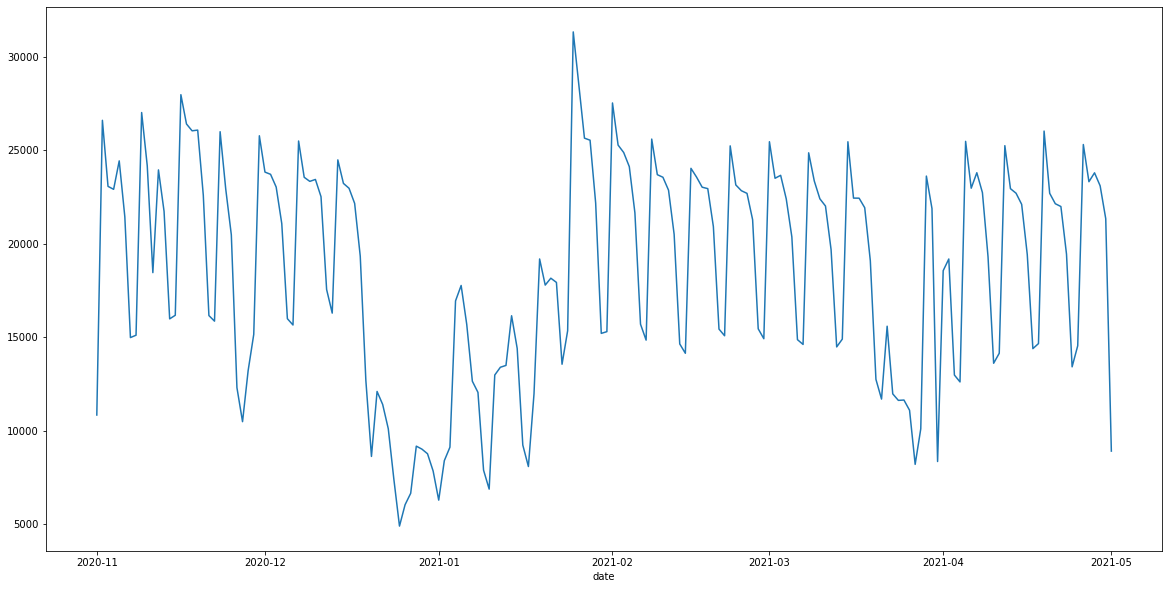

In [16]:
uniqueUsersPerDay.plot(figsize=(20,10))
plt.show()

In [234]:
uniqueUsersPerDay.mean()

18430.379120879123

In [ ]:
# on average 18,430 users login to sac state each day

In [17]:
failedLogins = logs[logs["Result"]=="FAILURE"]

In [18]:
failedLogins.head()

Timestamp (UTC)        Alias     Integration    Factor  \
10 2021-04-01 07:00:38.171370+00:00  user_048070  Single Sign-On  Duo Push   
14 2021-04-01 07:00:47.088446+00:00  user_018970  Single Sign-On  Duo Push   
33 2021-04-01 07:01:52.897370+00:00  user_021380  Single Sign-On       NaN   
68 2021-04-01 07:04:24.186870+00:00  user_051724  Single Sign-On  Duo Push   
84 2021-04-01 07:05:29.947741+00:00  user_017591  Single Sign-On       NaN   

     Result          Reason  Enrollment Access Device Country  \
10  FAILURE     No response       False                    US   
14  FAILURE     No response       False                    US   
33  FAILURE  User cancelled       False                    US   
68  FAILURE     No response       False                    JP   
84  FAILURE  User cancelled       False                    US   

   Access Device State Access Device City Access Device Hostname        date  \
10          California    West Sacramento                    NaN  2021-04-01   
14          California             Oxnard                    NaN  2021-04-01   
33          California            Oakland                    NaN  2021-04-01   
68              Aomori             Misawa                    NaN  2021-04-01   
84          California         Sacramento                    NaN  2021-04-01   

    month  hour  minute  second  
10      4     7       0      38  
14      4     7       0      47  
33      4     7       1      52  
68      4     7       4      24  
84      4     7       5      29

In [19]:
failedLogins = failedLogins.groupby(["Alias","date"]).size()

In [20]:
failedLogins.head()

Alias           date      
User_Not_Found  2020-11-02    2
                2020-11-06    2
                2020-11-07    1
                2020-11-09    2
                2020-11-10    1
dtype: int64

In [21]:
failedLogins = failedLogins.reset_index()

In [22]:
uniqueFailedUsersPerDay = failedLogins.groupby(["date"]).size()

In [23]:
uniqueFailedUsersPerDay.head()

date
2020-11-01     573
2020-11-02    1752
2020-11-03    1424
2020-11-04    1500
2020-11-05    2066
dtype: int64

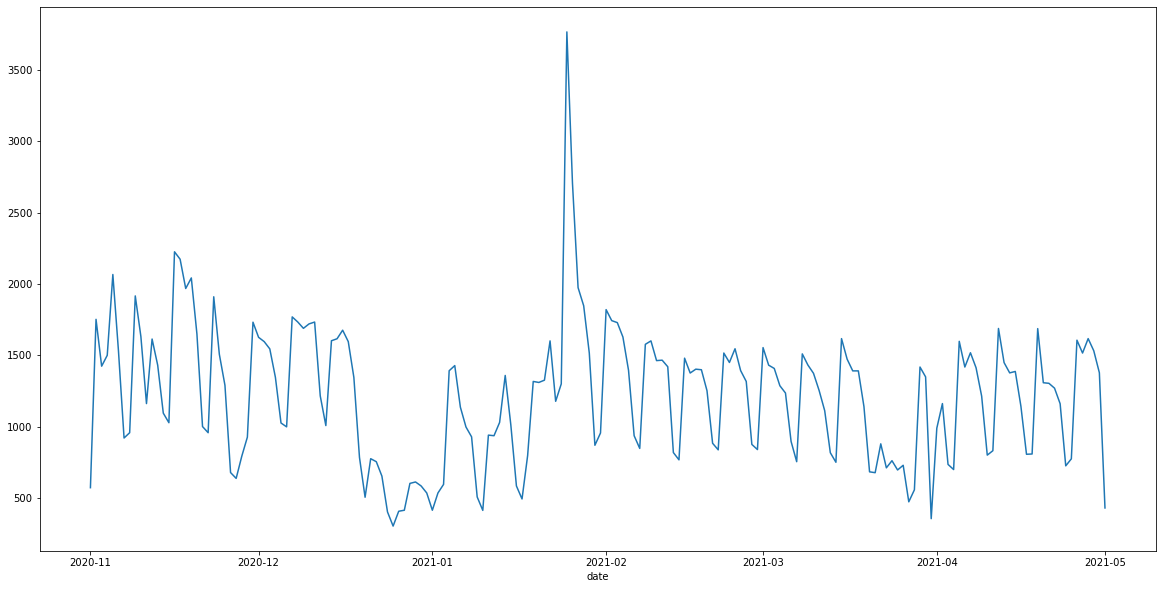

In [24]:
uniqueFailedUsersPerDay.plot(figsize=(20,10))
plt.show()

In [53]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller

result = adfuller(uniqueFailedUsersPerDay, autolag='AIC')

In [54]:
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.1041046183907373
p-value: 0.026250915809659027
Critial Values:
   1%, -3.470126426071447
Critial Values:
   5%, -2.8790075987120027
Critial Values:
   10%, -2.5760826967621644


In [25]:
uniqueFailedUsersPerDay.mean()

1212.7637362637363

In [26]:
uniqueFailedUsersPerDay.std()

482.8035119630593

In [56]:
logs.head()

Timestamp (UTC)        Alias     Integration      Factor  \
0 2021-04-01 07:00:07.957411+00:00  user_008576  Single Sign-On  Phone Call   
1 2021-04-01 07:00:10.492910+00:00  user_049277  Single Sign-On    Duo Push   
2 2021-04-01 07:00:11.738361+00:00  user_013462  Single Sign-On  Phone Call   
3 2021-04-01 07:00:25.203564+00:00  user_025756  Single Sign-On    Duo Push   
4 2021-04-01 07:00:27.389194+00:00  user_030286  Single Sign-On    Duo Push   

    Result         Reason  Enrollment Access Device Country  \
0  SUCCESS  User approved       False                    US   
1  SUCCESS  User approved       False                    US   
2  SUCCESS  User approved       False                    US   
3  SUCCESS  User approved       False                    US   
4  SUCCESS  User approved       False                    US   

  Access Device State Access Device City Access Device Hostname        date  \
0          California            Rocklin                    NaN  2021-04-01   
1          California        Santa Maria                    NaN  2021-04-01   
2          California      San Francisco                    NaN  2021-04-01   
3          California               Lodi                    NaN  2021-04-01   
4          California            Antioch                    NaN  2021-04-01   

   month  hour  minute  second  
0      4     7       0       7  
1      4     7       0      10  
2      4     7       0      11  
3      4     7       0      25  
4      4     7       0      27

In [55]:
users.head()

Alias  Status             Created      Last Login Phone 1 platform  \
0  user_000001  Active 2017-04-26 18:31:00  4/7/2021 15:00         Landline   
1  user_000002  Active 2017-04-26 18:58:00  4/6/2021 21:34          Android   
2  user_000003  Active 2017-04-27 20:42:00  4/6/2021 16:35         Landline   
3  user_000004  Active 2017-08-16 17:10:00  4/7/2021 14:23              iOS   
4  user_000005  Active 2017-09-12 22:03:00   4/7/2021 0:17          Android   

  Phone 2 platform Phone 3 platform Phone 4 platform Phone 5 platform  \
0              NaN              NaN              NaN              NaN   
1         Landline              NaN              NaN              NaN   
2          Android              NaN              NaN              NaN   
3         Landline              NaN              NaN              NaN   
4         Landline              NaN              NaN              NaN   

  Phone 6 platform Phone 7 platform  Student     Description  Index  
0              NaN              NaN    False  Active (Staff)      1  
1              NaN              NaN    False  Active (Staff)      2  
2              NaN              NaN    False  Active (Staff)      3  
3              NaN              NaN    False  Active (Staff)      4  
4              NaN              NaN    False  Active (Staff)      5